In [24]:
#!pip install opencv-python
#!pip install opencv-contrib-python
import cv2
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [4]:
!pip install deepface
from deepface import DeepFace

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 10.1 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=68d7c17c541d174757d799305f7030138f7e9554fc3f22f52ef1a8e5c13969f5
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire
Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [6]:
img=cv2.imread('/content/142223957.jpg')

In [5]:
import matplotlib

TypeError: ignored

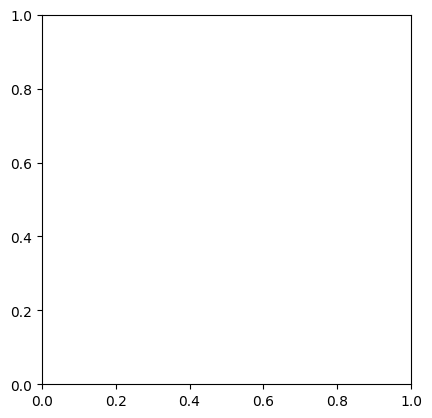

In [9]:
import matplotlib.pyplot as plt
plt.imshow(img)

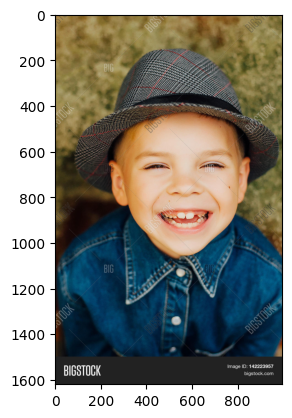

In [7]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [8]:
predictions= DeepFace.analyze(img)

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 17.4MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [00:13<00:00, 39.1MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [00:13<00:00, 39.6MB/s]


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [00:13<00:00, 40.3MB/s]
Action: race: 100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


In [9]:
predictions

[{'emotion': {'angry': 2.0299408820534381e-07,
   'disgust': 3.7032945374821605e-13,
   'fear': 1.4525670444243133e-06,
   'happy': 99.99996423721313,
   'sad': 4.0450666460856155e-05,
   'surprise': 1.4355980813840485e-09,
   'neutral': 2.7291536142115547e-06},
  'dominant_emotion': 'happy',
  'region': {'x': 253, 'y': 431, 'w': 612, 'h': 612},
  'age': 23,
  'gender': {'Woman': 2.189922519028187, 'Man': 97.81007766723633},
  'dominant_gender': 'Man',
  'race': {'asian': 0.2199303489881962,
   'indian': 0.01721492838277986,
   'black': 0.0016977971529439258,
   'white': 89.84697400611483,
   'middle eastern': 1.9161760086522108,
   'latino hispanic': 7.9980057774785625},
  'dominant_race': 'white'}]

In [10]:
predictions[0]['dominant_emotion']

'happy'

In [13]:
#draw rectangle around face
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [14]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(faceCascade.empty)
faces=faceCascade.detectMultiScale(gray,1.1,4)
#Draw a rectangle around the facts
for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

<built-in method empty of cv2.CascadeClassifier object at 0x7a0831c5dad0>


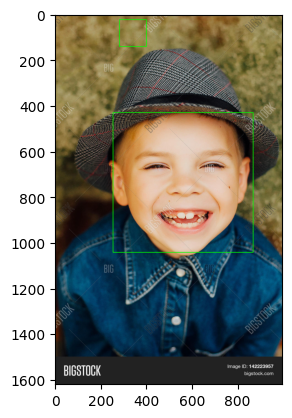

In [25]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

'happy'

In [52]:
font=cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img,
            predictions[0]['dominant_emotion'],
            (0,50),
            font,1,
  (0,0,255),
            2,
            cv2.LINE_4);

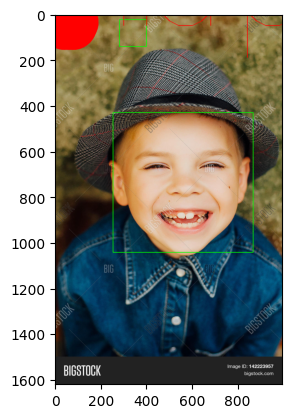

In [53]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [54]:
sad_pic_predictions= DeepFace.analyze(cv2.imread('/content/sad.jpg'))

Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.33it/s]


In [55]:
sad_pic_predictions

[{'emotion': {'angry': 1.2561456300318241,
   'disgust': 0.00541279478056822,
   'fear': 2.9007207602262497,
   'happy': 0.47094253823161125,
   'sad': 72.31594324111938,
   'surprise': 0.06310504395514727,
   'neutral': 22.98773229122162},
  'dominant_emotion': 'sad',
  'region': {'x': 17, 'y': 33, 'w': 69, 'h': 69},
  'age': 32,
  'gender': {'Woman': 12.09881380200386, 'Man': 87.9011869430542},
  'dominant_gender': 'Man',
  'race': {'asian': 0.5492082331329584,
   'indian': 4.079833626747131,
   'black': 0.1562663004733622,
   'white': 38.05178701877594,
   'middle eastern': 39.54063653945923,
   'latino hispanic': 17.622269690036774},
  'dominant_race': 'middle eastern'}]

In [56]:
sad_pic_predictions[0]['dominant_emotion']

'sad'

In [57]:
surprise_pic_predictions= DeepFace.analyze(cv2.imread('/content/surprise.jpg'))

Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]


In [58]:
surprise_pic_predictions

[{'emotion': {'angry': 0.00025750784971023677,
   'disgust': 3.638940277578273e-10,
   'fear': 0.03150869451928884,
   'happy': 0.0002532584176151431,
   'sad': 5.929941954141427e-09,
   'surprise': 99.96798038482666,
   'neutral': 2.2443100156088747e-08},
  'dominant_emotion': 'surprise',
  'region': {'x': 88, 'y': 18, 'w': 46, 'h': 46},
  'age': 38,
  'gender': {'Woman': 0.013429061800707132, 'Man': 99.98656511306763},
  'dominant_gender': 'Man',
  'race': {'asian': 4.927799850702286,
   'indian': 13.01347017288208,
   'black': 2.582538314163685,
   'white': 29.07460927963257,
   'middle eastern': 33.28582942485809,
   'latino hispanic': 17.11575835943222},
  'dominant_race': 'middle eastern'}]

In [59]:
surprise_pic_predictions[0]['dominant_emotion']

'surprise'

In [16]:
import cv2
from deepface import DeepFace
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

cap=cv2.VideoCapture(0)
#check if webcam opened correctly
if not cap.isOpened():
  cap=cv2.VideoCapture()
if not cap.isOpened():
  raise IOError('Cannot open webcam')
while True:
  ret,frame=cap.read()
  result=  DeepFace.analyze(frame,actions='emotion')
  gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
  faces=faceCascade.detectMultiScale(gray,1.1,4)
  #draw rectangle around the face
  for(x,y,w,h) in faces:
    cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
  font=cv2.FONT_HERSHEY_SIMPLEX#FONT_HERSEY_SIMPLEX
  font=cv2.FONT_HERSHEY_SIMPLEX
  cv2.putText(frame,
            result[0]['dominant_emotion'],
            (0,50),
            font,1,
  (0,0,255),
            2,
            cv2.LINE_4);

OSError: ignored

In [20]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


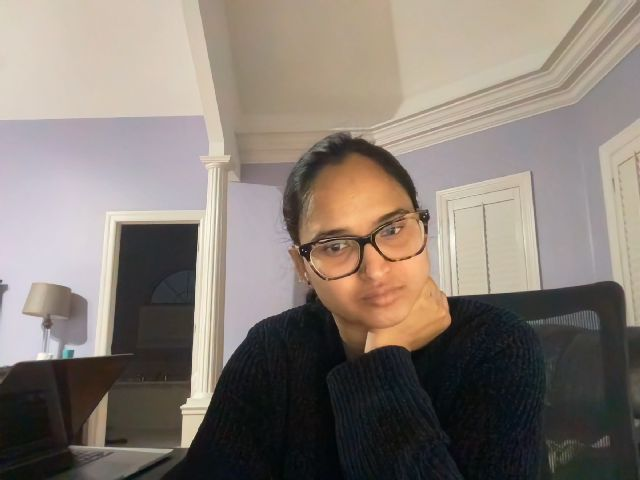

In [21]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [28]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  result=  DeepFace.analyze(img,actions='emotion')
  font=cv2.FONT_HERSHEY_SIMPLEX

  cv2.putText(img,
            result[0]['dominant_emotion'],
            (0,50),
            font,1,
  (0,0,255),
            2,
            cv2.LINE_4);
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

In [26]:
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

<IPython.core.display.Javascript object>

(480, 640)


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.34it/s]

Saved to photo.jpg


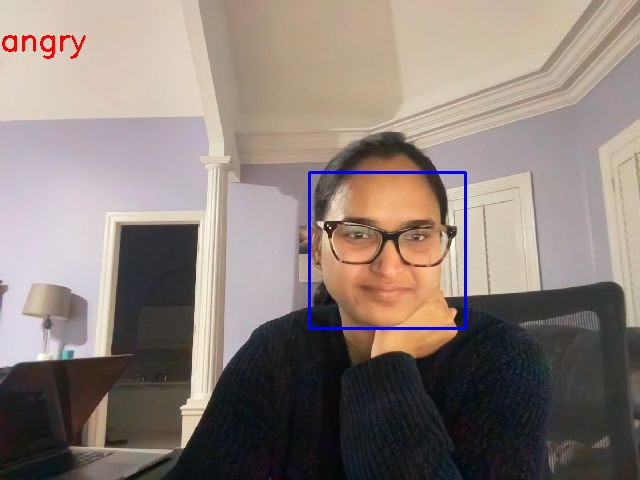

In [34]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
#google colab video. (web cam)


In [35]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [43]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    cv2.imwrite(filename, gray)
    result=  DeepFace.analyze(js_reply["img"],actions='emotion')
    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)
    cv2.putText(img,
            result[0]['dominant_emotion'],
            (0,50),
            font,1,
  (0,0,255),
            2,
            cv2.LINE_4);
    # draw face bounding box on image
        # save image
    cv2.imwrite(filename, img)
    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

ValueError: ignored